# 비선형 계획 문제의 쌍대정리 예제

<p style="text-align: right;">2018.10.11 조준우 metamath@gmail.com</p>

<hr/>

[주의] 이 글은 "서포트벡터머신을 위한 비선형 계획 문제의 쌍대정리"<sup>[jo]</sup>에 대한 예제 풀이기 때문에 이 문서를 읽기 전에 [jo]를 먼저 읽고 읽어야만 한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)
style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.core.display import display, HTML

init_notebook_mode(connected=True)

# https://github.com/plotly/plotly.py/issues/515
# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

### 예제 1

아래 예제에서는 코스트 함수가 볼록 함수가 아니라서 전역적으로 강한 쌍대성이 보장되지 않는 경우다. 하지만 국부 최소점에서 라그랑지안의 헤시안이 양정이 되어 국부적으로 강한 쌍대성이 성립되는 것을 확인할 수 있다. 이 문제는 "모두를 위한 컨벡스최적화"<sup>[cvxall]</sup>에서 인용되었다.

$$
\begin{aligned}
\text{minimize} \quad  & x^4 - 50x^2 + 100x \\[10pt]
& \text{s.t.} \quad x \geq -4.5
\end{aligned}
$$

최소화 문제 풀이와 단순 경계 제약조건을 다루기 위해 관련 `scipy` 모듈을 임포트 한다.

In [2]:
from scipy.optimize import Bounds
from scipy.optimize import minimize

In [5]:
def f(x):
    return x**4 - 50*x**2 + 100*x

def df(x):
    return 4*x**3 - 100*x + 100

bounds = Bounds([-4.5], [np.inf])

res = minimize(f, [0.0], jac=df, method='slsqp', bounds=bounds)

print(res)


     fun: -1052.4374999615127
     jac: array([185.5])
 message: 'Optimization terminated successfully.'
    nfev: 2
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-4.5])


원시 문제를 풀어보면 최적해 $x^*$는 -4.5, 목적함수의 기울기 값은 185.5가 된다. 제약조건이 단순 경계 부등호 제약조건이므로 목적함수의 기울기는 곧 라그랑지 승수가 되어 최적점에서의 라그랑지 승수 값은 185.5가 된다.

목적함수의 기울기와 라그랑지 승수의 관계를 조금만 보충설명을 해보면 다음과 같다. 우선 목적함수가 $f(x)$이고 '$g(x) \leq e$' 형태의 표준 부등호 제약이 있는 최소화 문제에서 라그랑지안은 다음과 같다.

$$
L(x, u) = f(x) + u(g(x)-e)
$$

$e$를 변화시킨다고 할 때, 즉 제약 조건을 완화 또는 강화했을 때 최적해가 달라지므로 최적해를 $e$에 대한 함수 $x^*(e)$, $u^*(e)$로 생각할 수 있다. 이런 내용을 반영하여 최적해에서의 라그랑지안을 다시 적으면

$$
L(x^*(e), u^*(e), e) = f(x^*(e)) + u^*(e) \{ g(x^*(e))-e \}
$$

이 된다. 이를 $e$에 대해 미분하면 연쇄법칙에 의해 다음과 같다.

$$
\frac{d L(x^*(e), u^*(e), e)}{d e} = \frac{\partial L}{\partial x}\frac{d x^*(e)}{d e} + \frac{\partial L}{\partial u}\frac{d u^*(e)}{d e} + \frac{\partial L}{\partial e}
$$

$(x^*, u^*)$에서 라그랑지안의 $x$, $u$에 대한 변화량은 0이므로 $\frac{\partial L}{\partial x} = \frac{\partial L}{\partial u} = 0$ 이다.

$$
\frac{d L(x^*(e), u^*(e), e)}{d e} = -u^*
$$

그런데 $x^*$가 최적해이고 $g(x)$가 활성이면 $g(x)=e$가 되어 $L(x^*, u^*) =  f(x^*)$ 이다. 따라서 최종적으로 다음과 같은 결과를 얻게 된다.

$$
\frac{d f( x^* (e) )}{d e} = -u^*
$$

이런 과정을 후최적성 해석이라고 하고 더 자세한 내용은 [khan], [arora:chapter 4.7]을 참고하면 된다. 결론으로 얻은 식을 가지고 이 문제의 경우를 생각해보자. 위 식을 연쇄법칙으로 다시 한번 더 풀어 적으면 다음과 같다.

$$
\frac{d f(x^*)}{d x} \frac{d x^*(e)}{de } = -u^*
$$
 
생각해봐야 할 것은 $\dfrac{d x^*(e)}{de }$인데 제약조건으로 주어지는 $x^*$와 $e$의 함수 관계에 따라 이 미분값이 달라지기 때문이다. 현재 문제에서는 제약조건이 $-x \leq 4.5$이다. 이 제약조건이 활성제약 조건이라는 것은 $-x=4.5$라는 의미고 $e$에 해당하는 부분이 4.5이므로 함수 관계는 $-x=e$가 된다. 즉 $g(x)=-x$이므로  $\dfrac{d x^*(e)}{de }=-1$이 되어 $\dfrac{d f(x^*)}{d x}=u^*$가 되게 된다. 부등식 제약조건에 대응되는 라그랑지 승수는 음수가 될 수 없으므로 최적점에서 목적함수의 기울기는 양수가 되어야 하고 아래 목적함수의 그래프를 보면 실제 양수임을 확인할 수 있고, 그 값은 185.5가 되는 것이다. 

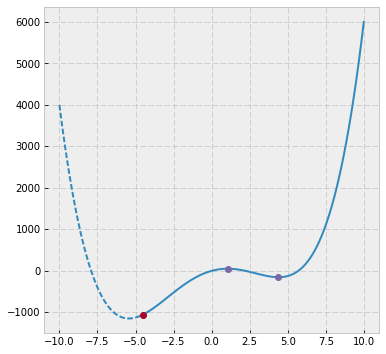

In [4]:
plt.rcParams["figure.figsize"] = (6,6)

# 최적해
x_star = res['x'][0]
u_star = res['jac'][0]
cost = res['fun']

# KKT 조건을 만족하는 후보최적해(손 풀이)
x_cand = [1.05, 4.39]
u_cand = [0.,   0.]
z_cand = [f(x_cand[0]), f(x_cand[1])]

k = bounds.lb[0]
x = np.linspace(-10, 10, 100)
x_fsb = np.linspace(k, 10, 100)
x_infsb = np.linspace(-10, k, 100)
u = np.linspace(0, 400, 100)

plt.plot(x_fsb, f(x_fsb), lw=2, color=style_colors[0])
plt.plot(x_infsb, f(x_infsb), '--', lw=2, color=style_colors[0])
plt.plot([x_star], [cost], 'o', color=style_colors[1])
plt.plot(x_cand, z_cand, 'o', color=style_colors[2])
plt.show()

위 그래프는 목적함수의 유용역역(실선)과 KKT 조건을 만족하는 후보최적점을 나타낸 것이다. 이제 원시 문제에 대한 라그랑지안을 그려보자.

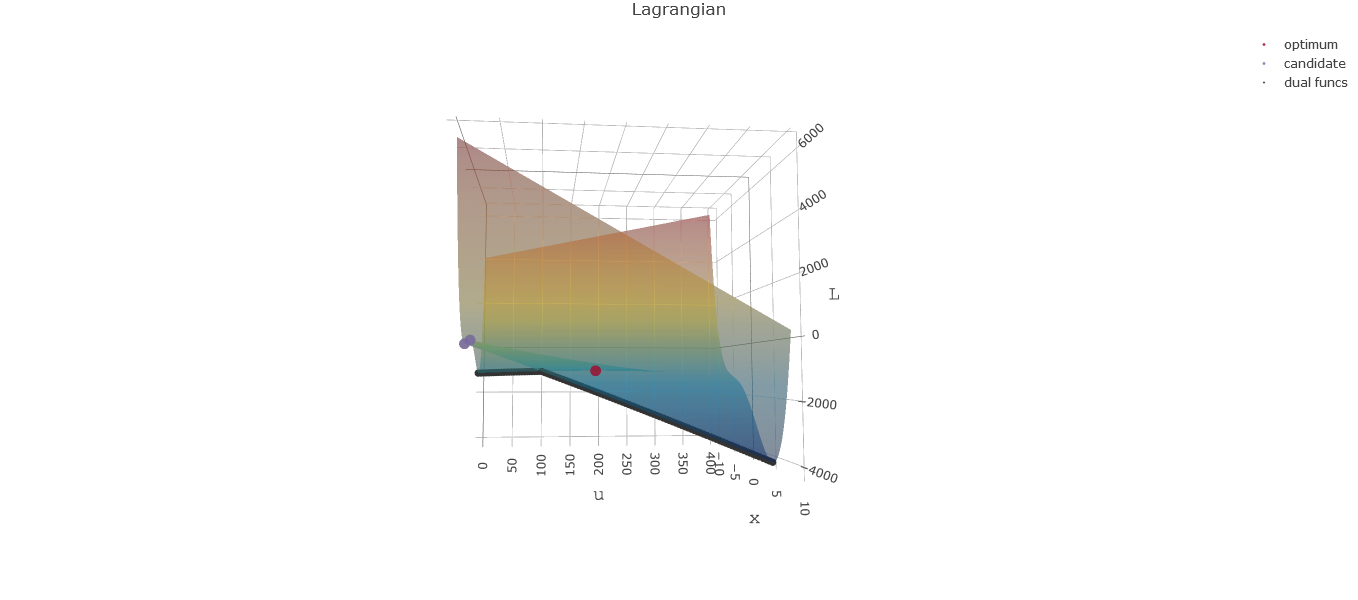

In [5]:
X, U = np.meshgrid(x, u)
L = f(X) + U*(k - X)
dual_x = x[np.argmin(L, axis=1)]
dual = np.min(L, axis=1)

#['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
# 'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
# 'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis']

surf1 = go.Surface(x=X, y=U, z=L, showscale=False, 
                   colorscale='Portland', 
                   name='Lagangian',
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=0.7,
                 )

# 최적해
optim = go.Scatter3d(
    x=[x_star], y=[u_star], z=[cost],
    mode='markers', name='optimum',
    marker=dict(
        size=3,
        opacity=0.8,
        color='#A60628'
    )
)

# KKT 조건을 만족하는 후보최소점
candidate = go.Scatter3d(
    x=x_cand, y=u_cand, z=z_cand,
    mode='markers', name='candidate',
    marker=dict(
        size=3,
        opacity=0.8,
        color='#7A68A6'
    )
)

# 쌍대함수
phi = go.Scatter3d(
    x=dual_x,
    y=u,
    z=dual,
    mode='markers',
    name='dual funcs',
    marker = dict(
        color = '#333333',
        size = 2)
)

layout = go.Layout(
    title="Lagrangian",
    autosize=False, 
    width=600, height=600,
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(xaxis=dict(title="x", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               yaxis=dict(title="u", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               zaxis=dict(title="L", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",))
              )
)

data = [surf1, optim, candidate, phi]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

위 3차원 그래프를 $u$축을 바라보는 방향에서 검은색 점들이 연결되게 잘 돌려보면 $u$에 대한 함수 형태로 보이게 되는데 그 모습을 2차원 그래프로 그려보면 아래와 같다. 

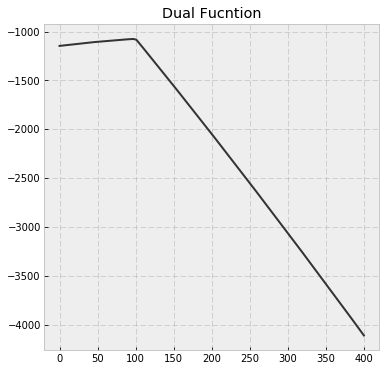

f(x*)=-1052.437500, phi(u*)=-1076.109600(about), u*=96.969697(about)


In [6]:
plt.plot(u, dual, lw=2, color='#333333')
plt.title("Dual Fucntion")
plt.show()

print("f(x*)={:f}, phi(u*)={:f}(about), u*={:f}(about)"
      .format(cost, np.max(dual), u[np.argmax(dual)]))

바로 쌍대 함수의 모양이고 최대점에서 쌍대함수의 값이 원시문제의 최소점에서 목적함수값과 차이를 보이고 있다. 하지만 국부 최소점 $(x^*, u^*)$에서 라그랑지안의 헤시안 $\mathbf{H}_{x}$가 양정이므로 국부적으로 쌍대정리를 적용할 수 있다. 즉 $(x^*, u^*) = (-4.5, 185.5)$ 근방에서만 생각한다면 라그랑지안의 모습은 아래와 같아 진다.

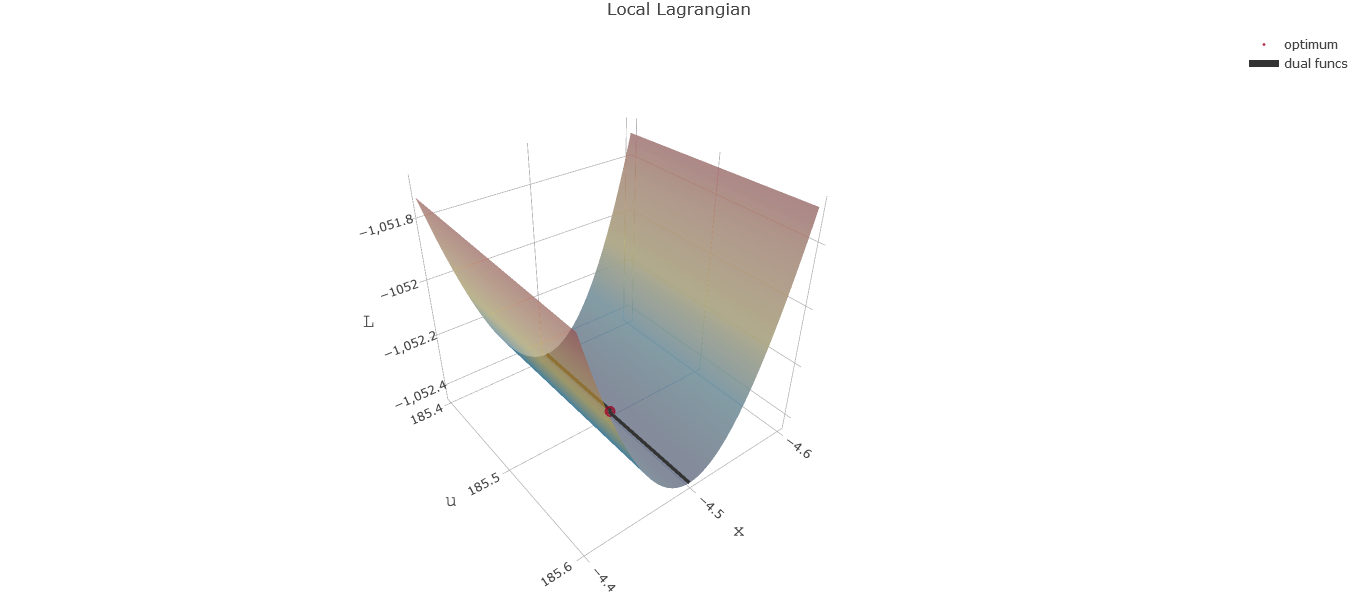

In [7]:
eps = 0.1
x_nrb = np.linspace(x_star-eps, x_star+eps, 100)
u_nrb = np.linspace(u_star-eps, u_star+eps, 100)

X, U = np.meshgrid(x_nrb, u_nrb)
L = f(X) + U*(k - X)
dual_x = x_nrb[np.argmin(L, axis=1)]
dual = np.min(L, axis=1)

surf1 = go.Surface(x=X, y=U, z=L, showscale=False, 
                   colorscale='Portland', 
                   name='Lagangian',
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=0.7,
                 )

# 쌍대함수
phi = go.Scatter3d(
    x=dual_x,
    y=u_nrb,
    z=dual,
    mode='lines',
    name='dual funcs',
    line = dict(
        color = '#333333',
        width = 7,)
)

layout = go.Layout(
    title="Local Lagrangian",
    autosize=False, 
    width=600, height=600,
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(xaxis=dict(title="x", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               yaxis=dict(title="u", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               zaxis=dict(title="L", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               aspectratio=dict(x=1, y=1, z=1),  
              )
)

data = [surf1, optim, phi]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

최적점 근방의 라그랑지안은 $x$에 대해 볼록함수이고 쌍대함수가 최적점을 지나는 것처럼 보인다. 쌍대함수는 거의 직선처럼 보이는데 최적점 근방으로 국소 영역을 더 좁히고 그래프를 좀 더 세밀하게 그려보면 국부적으로는 강한 쌍대성이 성립함을 확인할 수 있다.

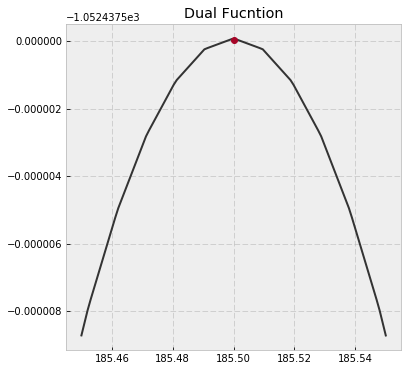

f(x*)=-1052.437500, phi(u*)=-1052.437500(about), |f(x*)-phi(u*)|=0.000000, u*=185.499495(about)


In [8]:
eps2 = eps / 2.
x_nrb = np.linspace(x_star-eps2, x_star+eps2, 1500)
u_nrb = np.linspace(u_star-eps2, u_star+eps2, 100)
X, U = np.meshgrid(x_nrb, u_nrb)
L = f(X) + U*(k - X)
dual_x = x_nrb[np.argmin(L, axis=1)]
dual = np.min(L, axis=1)

plt.plot(u_nrb, dual, lw=2, color='#333333')
plt.plot(u_star, cost, 'o', color=style_colors[1])
plt.title("Dual Fucntion")
plt.show()

print("f(x*)={:f}, phi(u*)={:f}(about), |f(x*)-phi(u*)|={:f}, u*={:f}(about)"
      .format(cost, np.max(dual), np.abs(cost-np.max(dual)), u_nrb[np.argmax(dual)]))

$f(x^*) = \phi(u^*)$이며 $u^*$가 쌍대 문제의 해가 됨을 확인할 수 있다.

### 예제 2

이번 예제에서는 국부 최적점에서 라그랑지안의 헤시안이 양정이 아닌 경우로 강한 쌍대성이 성립되지 않아 $f(x^*)$와 $\phi(u^*)$에서 쌍대차<sup>duality gap</sup>이 생기는 것을 확인할 수 있다. 즉, 약한 쌍대성만 성립하며 $\phi(u^*)$는 $f(x)$의 최소에 대한 하한을 제공하게 된다. 이 예제는 [arora]의 예제 4.30을 약간 변형한 것이다.

$$
\begin{aligned}
\text{minimize} \quad & \frac{1}{3} x^3 - 3x^2 + 8x + 1 \\[10pt]
& \text{s.t.} \quad x \geq \frac{1}{2}
\end{aligned}
$$

위 예제와 같이 원시문제를 풀고 그에 따른 그래프를 그려보면 아래와 같다.

In [9]:
def f(x) :
    """
    (1/3)x^3 - 3x^2 + 8x + 1
    """
    a = 1; b = 2; c = 4; d = 5; f0 = 1;

    return (1/3)*x**3 - (1/2)*(b+c)*x**2 + b*c*x + f0

def df(x):
    return x**2 -6*x + 8

bounds = Bounds([1/2], [np.inf])

res = minimize(f, [0.0], jac=df, method='slsqp', bounds=bounds)

print(res)

     fun: 4.291666666666666
     jac: array([5.25])
 message: 'Optimization terminated successfully.'
    nfev: 1
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.5])


이 경우 최적점에서의 목적함수의 기울기는 5.25이고 라그랑지 승수와 일치한다. 앞서 이야기한 후최적성 해석에 의해

$$
\frac{d f(x^*)}{d x} \frac{d x^*(e)}{de } = -u^*
$$

인데 제약조건이 $-x \leq -1/2$이므로 $g(x)=-x$가 된다. 후최적성 해석에서 변화시키는 매개변수 $e$는 $-1/2$에 해당하는 변수이므로 $e$와 $x^*$의 함수관계에서 $\dfrac{d x^*(e)}{de } = -1$이 되어 여기서도 목적함수의 기울기와 라그랑지 승수가 일치하게 된다.

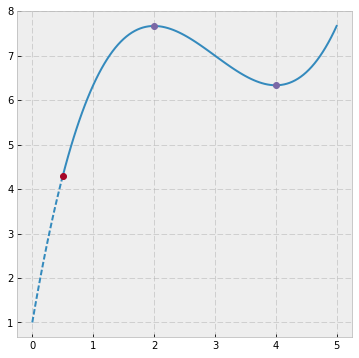

In [10]:
plt.rcParams["figure.figsize"] = (6,6)

# 최적해
x_star = res['x'][0]
u_star = res['jac'][0]
cost = res['fun']

# KKT 조건을 만족하는 후보최적해(손 풀이)
x_cand = [4, 2]
u_cand = [0.,   0.]
z_cand = [f(x_cand[0]), f(x_cand[1])]

k = bounds.lb[0]
x = np.linspace(0, 5, 100)
x_fsb = np.linspace(k, 5, 100)
x_infsb = np.linspace(0, k, 100)
u = np.linspace(0, 10, 100)

plt.plot(x_fsb, f(x_fsb), lw=2, color=style_colors[0])
plt.plot(x_infsb, f(x_infsb), '--', lw=2, color=style_colors[0])
plt.plot([x_star], [cost], 'o', color=style_colors[1])
plt.plot(x_cand, z_cand, 'o', color=style_colors[2])
plt.show()

위 그래프는 목적함수의 유용역역(실선)과 KKT 조건을 만족하는 후보최적점을 나타낸 것이다. 이제 원시 문제에 대한 라그랑지안을 그려보자.

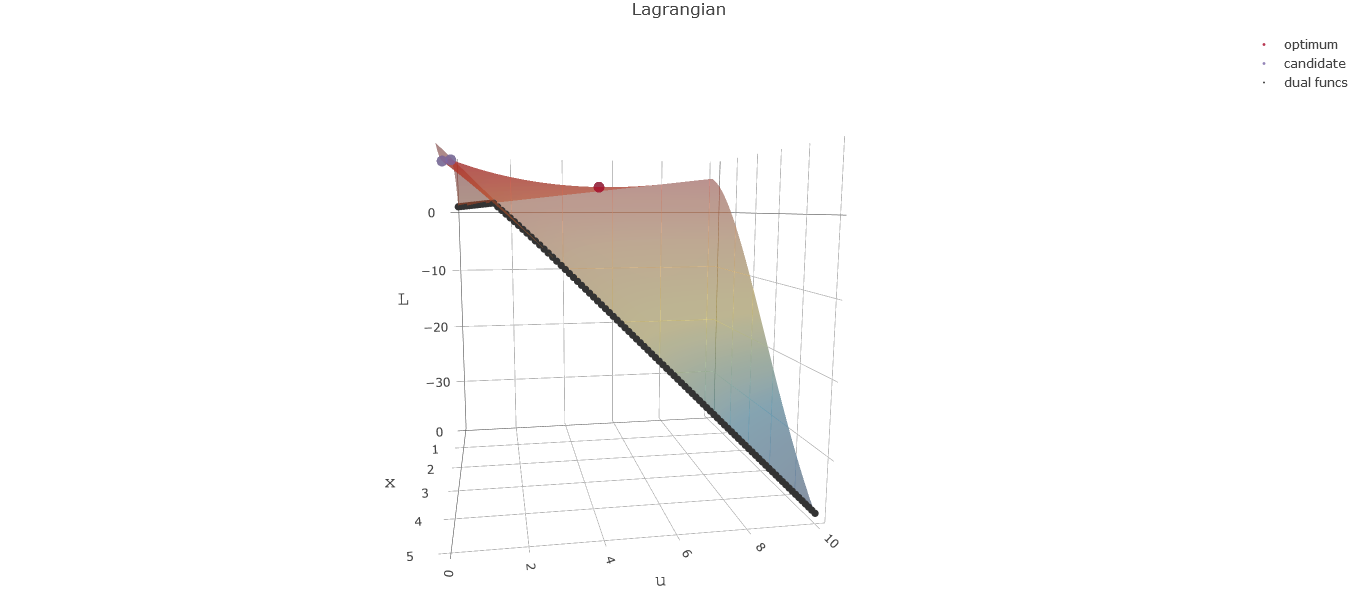

In [11]:
X, U = np.meshgrid(x, u)
L = f(X) + U*(k - X)
dual_x = x[np.argmin(L, axis=1)]
dual = np.min(L, axis=1)

surf1 = go.Surface(x=X, y=U, z=L, showscale=False, 
                   colorscale='Portland', 
                   name='Lagangian',
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=0.7,
                 )

# 최적해
optim = go.Scatter3d(
    x=[x_star], y=[u_star], z=[cost],
    mode='markers', name='optimum',
    marker=dict(
        size=3,
        opacity=0.8,
        color='#A60628'
    )
)

# KKT 조건을 만족하는 후보최소점
candidate = go.Scatter3d(
    x=x_cand, y=u_cand, z=z_cand,
    mode='markers', name='candidate',
    marker=dict(
        size=3,
        opacity=0.8,
        color='#7A68A6'
    )
)

# 쌍대함수
phi = go.Scatter3d(
    x=dual_x,
    y=u,
    z=dual,
    mode='markers',
    name='dual funcs',
    marker = dict(
        color = '#333333',
        size = 2)
)

layout = go.Layout(
    title="Lagrangian",
    autosize=False, 
    width=600, height=600,
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(xaxis=dict(title="x", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               yaxis=dict(title="u", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               zaxis=dict(title="L", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",))
              )
)

data = [surf1, optim, candidate, phi]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

위 3차원 그래프를 $u$축을 바라보는 방향에서 검은색 점들이 연결되게 잘 돌려보면 $u$에 대한 함수 형태로 보이게 되는데 그 모습을 2차원 그래프로 그려보면 아래와 같다. 

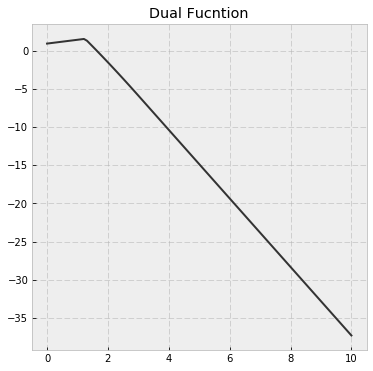

f(x*)=4.291667, phi(u*)=1.606061(about), u*=1.212121(about)


In [12]:
plt.plot(u, dual, lw=2, color='#333333')
plt.title("Dual Fucntion")
plt.show()

print("f(x*)={:f}, phi(u*)={:f}(about), u*={:f}(about)"
      .format(cost, np.max(dual), u[np.argmax(dual)]))

이 예제의 경우 라그랑지안의 형상을 보면 최적점 근방에서 볼록함수가 아님을 알 수 있다. 실제로 계산해보면 $\mathbf{H}_x(\frac{1}{2}) = -5$가 되어 헤시안이 음정이다. 이 경우 국부적인 라그랑지안을 살펴보자.

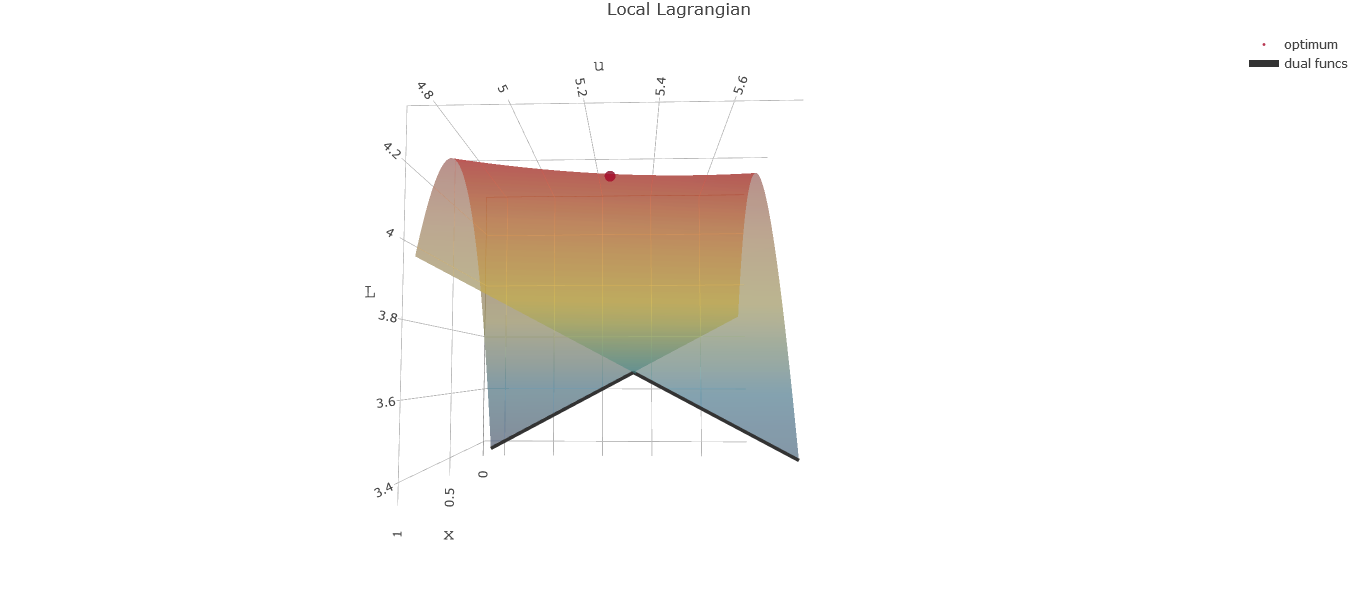

In [13]:
eps = 0.5
x_nrb = np.linspace(x_star-eps, x_star+eps, 100)
u_nrb = np.linspace(u_star-eps, u_star+eps, 100)

X, U = np.meshgrid(x_nrb, u_nrb)
L = f(X) + U*(k - X)
dual_x = x_nrb[np.argmin(L, axis=1)]
dual = np.min(L, axis=1)

surf1 = go.Surface(x=X, y=U, z=L, showscale=False, 
                   colorscale='Portland', 
                   name='Lagangian',
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=0.7,
                 )

# 쌍대함수
phi = go.Scatter3d(
    x=dual_x,
    y=u_nrb,
    z=dual,
    mode='lines',
    name='dual funcs',
    line = dict(
        color = '#333333',
        width = 7,)
)

layout = go.Layout(
    title="Local Lagrangian",
    autosize=False, 
    width=600, height=600,
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(xaxis=dict(title="x", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               yaxis=dict(title="u", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               zaxis=dict(title="L", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               aspectratio=dict(x=1, y=1, z=1),  
              )
)

data = [surf1, optim, phi]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

최적해 근방의 국부적 라그랑지안을 보더라도 크게 달라지지 않는다. 역시 검은색 점이 모두 연결되게 $u$축이 보이는 방향으로 잘 돌려보면 쌍대함수의 최대점에서 $u$와 최적점에서 $u$가 서로 다른것을 볼 수 있다. 

원문제의 최적해와 그에 상응하는 라그랑지 승수를 $(x^*, \bar{u})$라하고 쌍대문제의 최적해와 그에 상응하는 $x$를 $(\hat{x}, u^*)$라하면 $x^* \ne \hat{x}$, $u^* \ne \bar{u}$이다.

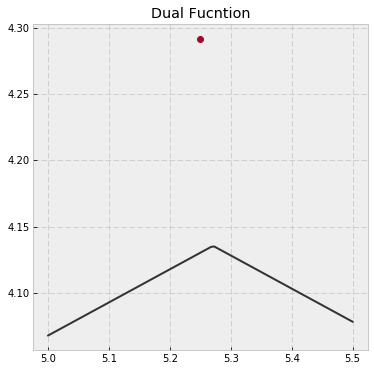

f(x*)=4.291667, phi(u*)=4.134943(about), |f(x*)-phi(u*)|=0.156723, u*=5.272727(about)


In [14]:
eps2 = eps / 2.
x_nrb = np.linspace(x_star-eps2, x_star+eps2, 1500)
u_nrb = np.linspace(u_star-eps2, u_star+eps2, 100)
X, U = np.meshgrid(x_nrb, u_nrb)
L = f(X) + U*(k - X)
dual_x = x_nrb[np.argmin(L, axis=1)]
dual = np.min(L, axis=1)

plt.plot(u_nrb, dual, lw=2, color='#333333')
plt.plot(u_star, cost, 'o', color=style_colors[1])
plt.title("Dual Fucntion")
plt.show()

print("f(x*)={:f}, phi(u*)={:f}(about), |f(x*)-phi(u*)|={:f}, u*={:f}(about)"
      .format(cost, np.max(dual), np.abs(cost-np.max(dual)), u_nrb[np.argmax(dual)]))

하지만 위 그림에서처럼 $f(x^*) > \phi(u^*)$는 보장되어 약한 쌍대성은 성립함을 알 수 있다. 

$(x^*, \bar{u})=(\hat{x}, u^*)$가 되는 것이 바로 강한 쌍대성이고 이렇게 되기 위해서는 먼저 예제에서 확인한 것처럼 라그랑지안의 헤시안이 양정이고 최적점에서 제약조건에 대한 자격요건<sup>constraint qualifications</sup>이 LICQ(Linear independence constraint qualification)<sup>[kkt:wiki]</sup>를 만족하는 것이다. 또는 SC(Slater CQ)를 만족해도 된다.<sup>[boyd]</sup>

### 참고 문헌

1. [khan] Interpretation of Lagrange multipliers, https://ko.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/constrained-optimization/a/interpretation-of-lagrange-multipliers

2. [cvxall] 모두를 위한 컨벡스 최적화, https://wikidocs.net/20584

3. [arora] INTRODUCTION TO OPTIMUM ESIGN 4th ed., J. S. Arora, Academic Press

4. [kkt:wiki] Regularity_conditions, https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions#Regularity_conditions_(or_constraint_qualifications)

5. [boyd] Convex Optimization, Stephen Boyd, Lieven Vandenberghe, CAMBRIDGE UNIV. Press

6. [jo] 서포트벡터머신을 위한 비선형 계획 문제의 쌍대정리, https://metamath1.github.io/2018/10/08/duality.html

In [15]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1 { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2 { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    h4 { font-family: 'Noto Sans KR' !important; color:#7A68A6 !important;   }        
            
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item):not(.p-Menu-item)   
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #D55E00; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>